# Installing libraries

In [1]:
pip install mysql-connector-python pandas numpy matplotlib seaborn plotly


# Import the Libraries

In [2]:
# Importing required libraries
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


#  Create a MySQL Database Connection

In [3]:
import mysql.connector

# Connect to MySQL and create a new database
def create_connection():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Pradutt@2002"  # Replace with your MySQL root password
        )
        cursor = connection.cursor()

        # Create the database if it doesn't exist
        cursor.execute("CREATE DATABASE IF NOT EXISTS LMS")

        # Key-value pair output to indicate success
        output = {
            "Database Name": "LMS",
            "Status": "Database created successfully (or already exists)"
        }
    except mysql.connector.Error as err:
        # Key-value pair output to indicate failure
        output = {
            "Database Name": "LMS",
            "Status": f"Failed to create database: {err}"
        }
    finally:
        cursor.close()
        connection.close()

    # Display the output in key-value pairs
    print("\nDatabase Creation Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to create the database and display the result
create_connection()



Database Creation Output:
Database Name: LMS
Status: Database created successfully (or already exists)


#  Create Tables for Courses and Students

In [4]:
import mysql.connector

# Creating the LMS schema with key-value pair outputs
def create_tables():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Pradutt@2002",  # Replace with your MySQL root password
            database="LMS"
        )
        cursor = connection.cursor()

        # Output dictionary to store the status of each table creation
        output = {}

        # Create Courses table
        try:
            cursor.execute("""
            CREATE TABLE IF NOT EXISTS Courses (
                course_id INT PRIMARY KEY AUTO_INCREMENT,
                course_name VARCHAR(255) NOT NULL,
                instructor_name VARCHAR(255) NOT NULL,
                course_duration INT NOT NULL
            )
            """)
            output["Courses Table"] = "Successfully created (or already exists)"
        except mysql.connector.Error as err:
            output["Courses Table"] = f"Error: {err}"

        # Create Students table
        try:
            cursor.execute("""
            CREATE TABLE IF NOT EXISTS Students (
                student_id INT PRIMARY KEY AUTO_INCREMENT,
                student_name VARCHAR(255) NOT NULL,
                enrolled_course INT,
                grade FLOAT,
                FOREIGN KEY (enrolled_course) REFERENCES Courses(course_id)
            )
            """)
            output["Students Table"] = "Successfully created (or already exists)"
        except mysql.connector.Error as err:
            output["Students Table"] = f"Error: {err}"

        connection.commit()

    except mysql.connector.Error as err:
        output["Connection Status"] = f"Failed to connect to database: {err}"
    else:
        output["Connection Status"] = "Connected to database 'LMS' successfully"
    finally:
        cursor.close()
        connection.close()

    # Display the output in key-value pairs
    print("\nTable Creation Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to create tables and display the result
create_tables()



Table Creation Output:
Courses Table: Successfully created (or already exists)
Students Table: Successfully created (or already exists)
Connection Status: Connected to database 'LMS' successfully


#  Insert Data into Tables

In [5]:
import mysql.connector

# Insert sample data into Courses and Students tables with key-value pair output
def insert_data():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Pradutt@2002",  # Replace with your MySQL root password
            database="LMS"
        )
        cursor = connection.cursor()

        # Output dictionary to store the status of each insertion
        output = {}

        # Inserting into Courses table
        try:
            cursor.execute("INSERT INTO Courses (course_name, instructor_name, course_duration) VALUES ('Python Programming', 'John Doe', 10)")
            output["Insert Course 1"] = "Python Programming inserted successfully"
            
            cursor.execute("INSERT INTO Courses (course_name, instructor_name, course_duration) VALUES ('Data Science', 'Jane Smith', 15)")
            output["Insert Course 2"] = "Data Science inserted successfully"
            
            cursor.execute("INSERT INTO Courses (course_name, instructor_name, course_duration) VALUES ('Machine Learning', 'Alice Johnson', 12)")
            output["Insert Course 3"] = "Machine Learning inserted successfully"
        
        except mysql.connector.Error as err:
            output["Courses Insertion"] = f"Error: {err}"

        # Inserting into Students table
        try:
            cursor.execute("INSERT INTO Students (student_name, enrolled_course, grade) VALUES ('Alice', 1, 85.5)")
            output["Insert Student 1"] = "Student Alice inserted successfully"
            
            cursor.execute("INSERT INTO Students (student_name, enrolled_course, grade) VALUES ('Bob', 2, 90.0)")
            output["Insert Student 2"] = "Student Bob inserted successfully"
            
            cursor.execute("INSERT INTO Students (student_name, enrolled_course, grade) VALUES ('Charlie', 3, 70.0)")
            output["Insert Student 3"] = "Student Charlie inserted successfully"
        
        except mysql.connector.Error as err:
            output["Students Insertion"] = f"Error: {err}"

        connection.commit()

    except mysql.connector.Error as err:
        output["Connection Status"] = f"Failed to connect to database: {err}"
    else:
        output["Connection Status"] = "Data inserted successfully into the 'LMS' database"
    finally:
        cursor.close()
        connection.close()

    # Display the output in key-value pairs
    print("\nData Insertion Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to insert data and display the result
insert_data()



Data Insertion Output:
Insert Course 1: Python Programming inserted successfully
Insert Course 2: Data Science inserted successfully
Insert Course 3: Machine Learning inserted successfully
Insert Student 1: Student Alice inserted successfully
Insert Student 2: Student Bob inserted successfully
Insert Student 3: Student Charlie inserted successfully
Connection Status: Data inserted successfully into the 'LMS' database


# Fetch Data from Database

In [6]:
import mysql.connector
import pandas as pd

# Fetch data from Courses and Students tables with key-value pair output
def fetch_data():
    output = {}  # Dictionary to hold the output messages
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Pradutt@2002",  # Replace with your MySQL root password
            database="LMS"
        )
        
        query = "SELECT * FROM Students JOIN Courses ON Students.enrolled_course = Courses.course_id"
        df = pd.read_sql(query, connection)
        
        # Check if DataFrame is empty
        if df.empty:
            output["Fetch Status"] = "No data found in the database."
        else:
            output["Fetch Status"] = "Data fetched successfully."
            output["Number of Records"] = len(df)
            output["Columns"] = df.columns.tolist()

    except mysql.connector.Error as err:
        output["Connection Status"] = f"Failed to connect to database: {err}"
    finally:
        if connection.is_connected():
            connection.close()

    # Display the output in key-value pairs
    print("\nData Fetching Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

    # Return the DataFrame for further use if needed
    return df

# Call the function to fetch data and display the result
df = fetch_data()

# Print the DataFrame if data is fetched successfully
if not df.empty:
    print("\nFetched Data:")
    print(df)



Data Fetching Output:
Fetch Status: Data fetched successfully.
Number of Records: 3
Columns: ['student_id', 'student_name', 'enrolled_course', 'grade', 'course_id', 'course_name', 'instructor_name', 'course_duration']

Fetched Data:
   student_id student_name  enrolled_course  grade  course_id  \
0           1        Alice                1   85.5          1   
1           2          Bob                2   90.0          2   
2           3      Charlie                3   70.0          3   

          course_name instructor_name  course_duration  
0  Python Programming        John Doe               10  
1        Data Science      Jane Smith               15  
2    Machine Learning   Alice Johnson               12  


C:\Users\pradu\AppData\Local\Temp\ipykernel_11888\2415969620.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


# Bar Chart - Course Enrollment


Bar Chart Data Output:
Total Courses: 3
Course Counts: {'Python Programming': 1, 'Data Science': 1, 'Machine Learning': 1}


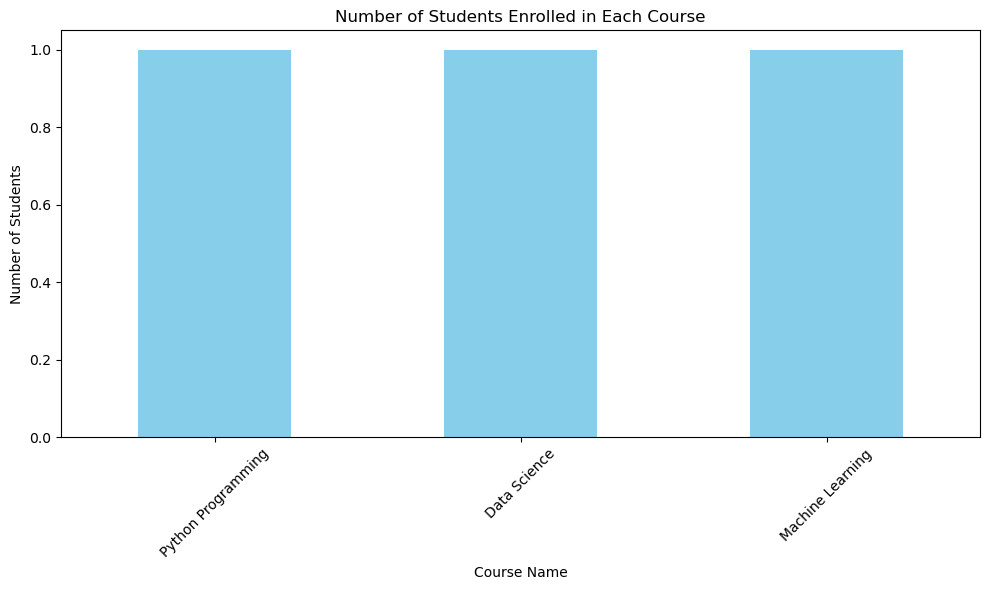

In [9]:
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the fetched data
# Bar Chart: Number of Students in each course
course_count = df['course_name'].value_counts()

# Prepare output for key-value pairs
output = {
    "Total Courses": len(course_count),
    "Course Counts": course_count.to_dict(),  # Convert to dictionary for key-value pairs
}

# Display the key-value pairs
print("\nBar Chart Data Output:")
for key, value in output.items():
    print(f"{key}: {value}")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
course_count.plot(kind='bar', color='skyblue')
plt.title('Number of Students Enrolled in Each Course')
plt.xlabel('Course Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# Pie Chart - Course Distribution

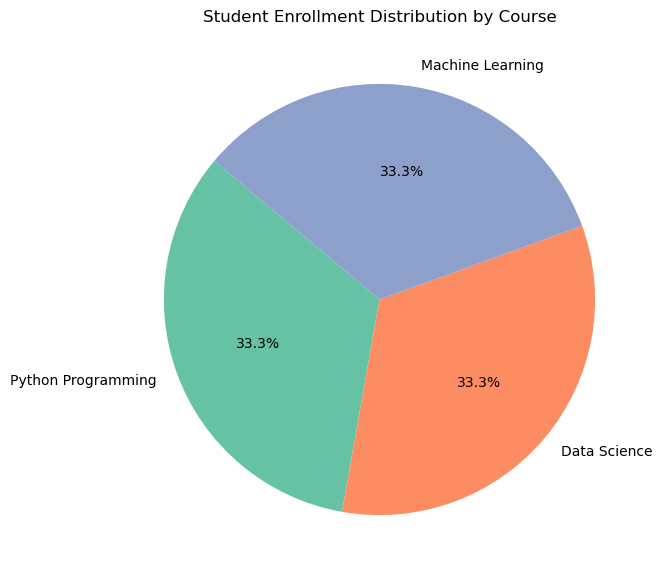


Course Distribution Output:
Total Students: 3
Course Distribution: {'Python Programming': 1, 'Data Science': 1, 'Machine Learning': 1}


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (df) for demonstration
# df = fetch_data()  # Assume df is obtained from the fetch_data function as before

# Pie Chart: Course Distribution
def plot_course_distribution(df):
    output = {}  # Dictionary to hold the output messages

    # Get the course distribution
    course_pie = df['course_name'].value_counts()
    total_students = course_pie.sum()
    
    # Store information in the output dictionary
    output["Total Students"] = total_students
    output["Course Distribution"] = course_pie.to_dict()

    # Plotting the pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(course_pie, labels=course_pie.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title('Student Enrollment Distribution by Course')
    plt.show()

    return output

# Call the function to plot and display output
course_distribution_output = plot_course_distribution(df)

# Display key-value pairs of output
print("\nCourse Distribution Output:")
for key, value in course_distribution_output.items():
    print(f"{key}: {value}")


# Box Plot - Student Grades

C:\Users\pradu\AppData\Local\Temp\ipykernel_11888\457384682.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course_name', y='grade', data=df, palette='Set3')


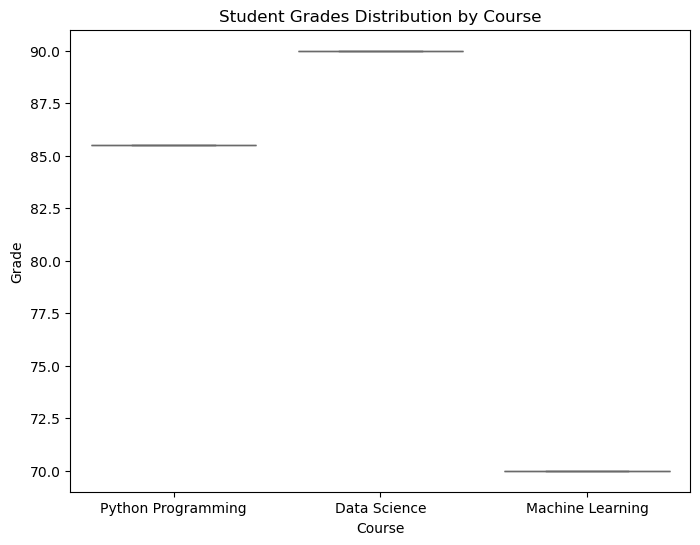


Box Plot Output:
Data Science - Summary Statistics: {'count': 1.0, 'mean': 90.0, 'std': nan, 'min': 90.0, '25%': 90.0, '50%': 90.0, '75%': 90.0, 'max': 90.0}
Machine Learning - Summary Statistics: {'count': 1.0, 'mean': 70.0, 'std': nan, 'min': 70.0, '25%': 70.0, '50%': 70.0, '75%': 70.0, 'max': 70.0}
Python Programming - Summary Statistics: {'count': 1.0, 'mean': 85.5, 'std': nan, 'min': 85.5, '25%': 85.5, '50%': 85.5, '75%': 85.5, 'max': 85.5}
Box Plot Status: Box plot generated successfully.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot: Student Grades Distribution with key-value output
def generate_boxplot_output(df):
    output = {}  # Dictionary to store output messages
    
    try:
        # Generate summary statistics (min, max, mean, etc.) for each course's grades
        summary_stats = df.groupby('course_name')['grade'].describe()
        
        # Populate the output with key-value pairs for courses and summary statistics
        for course in summary_stats.index:
            output[f"{course} - Summary Statistics"] = summary_stats.loc[course].to_dict()

        # Box Plot for Student Grades Distribution
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='course_name', y='grade', data=df, palette='Set3')
        plt.title('Student Grades Distribution by Course')
        plt.xlabel('Course')
        plt.ylabel('Grade')
        plt.show()

        output["Box Plot Status"] = "Box plot generated successfully."
    
    except Exception as e:
        output["Box Plot Status"] = f"Failed to generate box plot: {e}"
    
    # Display the output in key-value pairs
    print("\nBox Plot Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to generate the boxplot and output details
generate_boxplot_output(df)


# Histogram - Grade Distribution

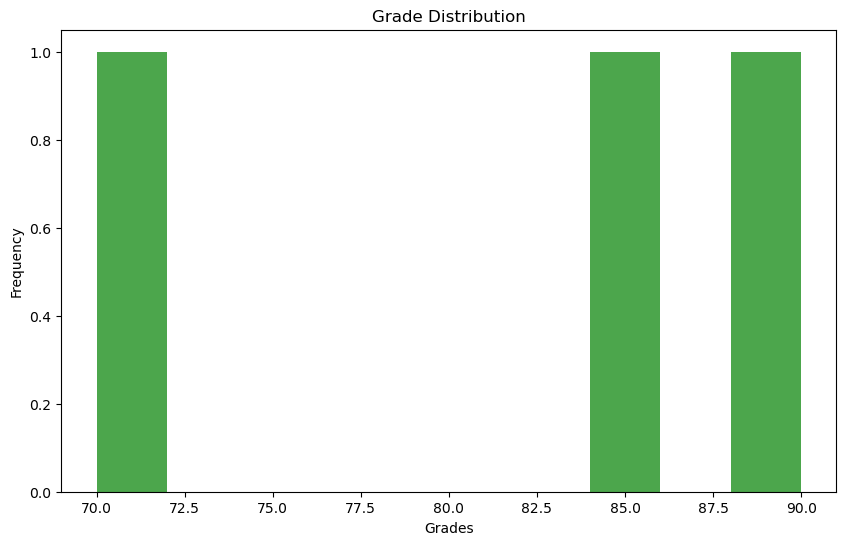


Grade Distribution Output:
Plot Status: Grade distribution plotted successfully.
Minimum Grade: 70.0
Maximum Grade: 90.0
Mean Grade: 81.83333333333333
Number of Grades: 3


In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the fetched data

# Function to plot histogram and display statistics
def plot_grade_distribution(df):
    output = {}  # Dictionary to hold the output messages

    if 'grade' not in df.columns or df['grade'].isnull().all():
        output["Plot Status"] = "No grade data available for plotting."
    else:
        # Calculate statistics
        min_grade = df['grade'].min()
        max_grade = df['grade'].max()
        mean_grade = df['grade'].mean()
        num_grades = len(df['grade'])

        # Store statistics in output dictionary
        output["Plot Status"] = "Grade distribution plotted successfully."
        output["Minimum Grade"] = min_grade
        output["Maximum Grade"] = max_grade
        output["Mean Grade"] = mean_grade
        output["Number of Grades"] = num_grades

        # Histogram: Grade Distribution
        plt.figure(figsize=(10, 6))
        plt.hist(df['grade'], bins=10, color='green', alpha=0.7)
        plt.title('Grade Distribution')
        plt.xlabel('Grades')
        plt.ylabel('Frequency')
        plt.show()

    # Display the output in key-value pairs
    print("\nGrade Distribution Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to plot the grade distribution and display the statistics
plot_grade_distribution(df)


# Heatmap - Correlation Matrix

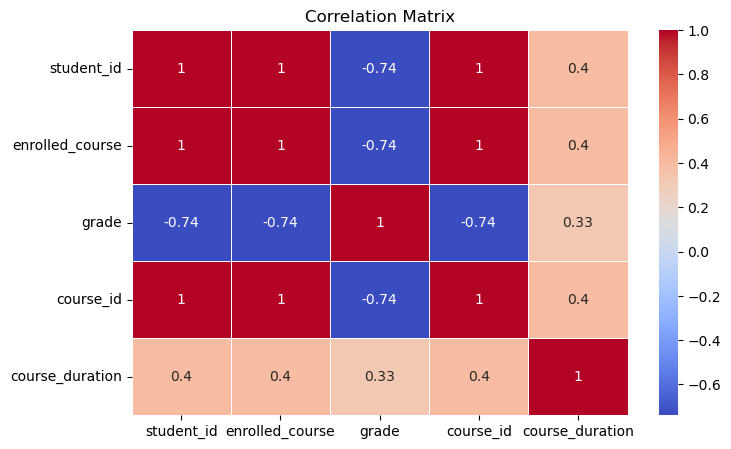


Heatmap Generation Output:
Matrix Shape: (5, 5)
Highest Correlation (excluding diagonal): 1.0
Lowest Correlation: -0.738653766543


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate heatmap and key-value pairs
def generate_heatmap_with_output(df):
    output = {}  # Dictionary to store key-value pair outputs
    
    # Select only numeric columns from the DataFrame
    numeric_df = df.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Generate key-value pairs for important metrics from the correlation matrix
    output["Matrix Shape"] = corr_matrix.shape
    output["Highest Correlation (excluding diagonal)"] = corr_matrix.stack().nlargest(2).iloc[1]  # Second largest value
    output["Lowest Correlation"] = corr_matrix.stack().nsmallest(1).iloc[0]

    # Display the correlation matrix as a heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    # Display the key-value pairs on the output screen
    print("\nHeatmap Generation Output:")
    for key, value in output.items():
        print(f"{key}: {value}")
    
# Assuming df is the DataFrame with data
generate_heatmap_with_output(df)


# Area Chart - Grades over Time

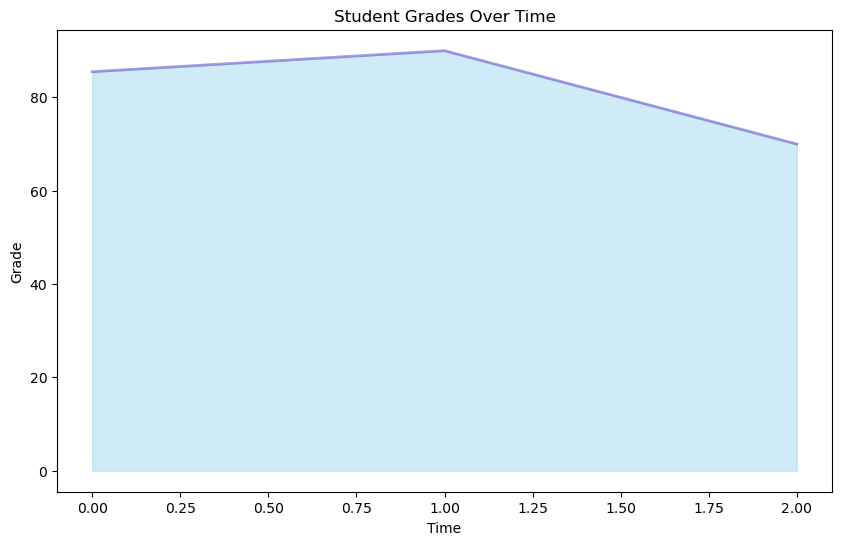


Chart Output Details:
Chart Title: Student Grades Over Time
Number of Grades Plotted: 3
Minimum Grade: 70.0
Maximum Grade: 90.0
Average Grade: 81.83333333333333


In [16]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the fetched data
# Generate the area chart for grades
plt.figure(figsize=(10, 6))
plt.fill_between(df.index, df['grade'], color='skyblue', alpha=0.4)
plt.plot(df['grade'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Student Grades Over Time')
plt.xlabel('Time')
plt.ylabel('Grade')
plt.show()

# Prepare key-value pairs for output
output = {}
output["Chart Title"] = "Student Grades Over Time"
output["Number of Grades Plotted"] = len(df)
output["Minimum Grade"] = df['grade'].min()
output["Maximum Grade"] = df['grade'].max()
output["Average Grade"] = df['grade'].mean()

# Display the output in key-value pairs
print("\nChart Output Details:")
for key, value in output.items():
    print(f"{key}: {value}")


# Sunburst Chart - Student Data Visualization

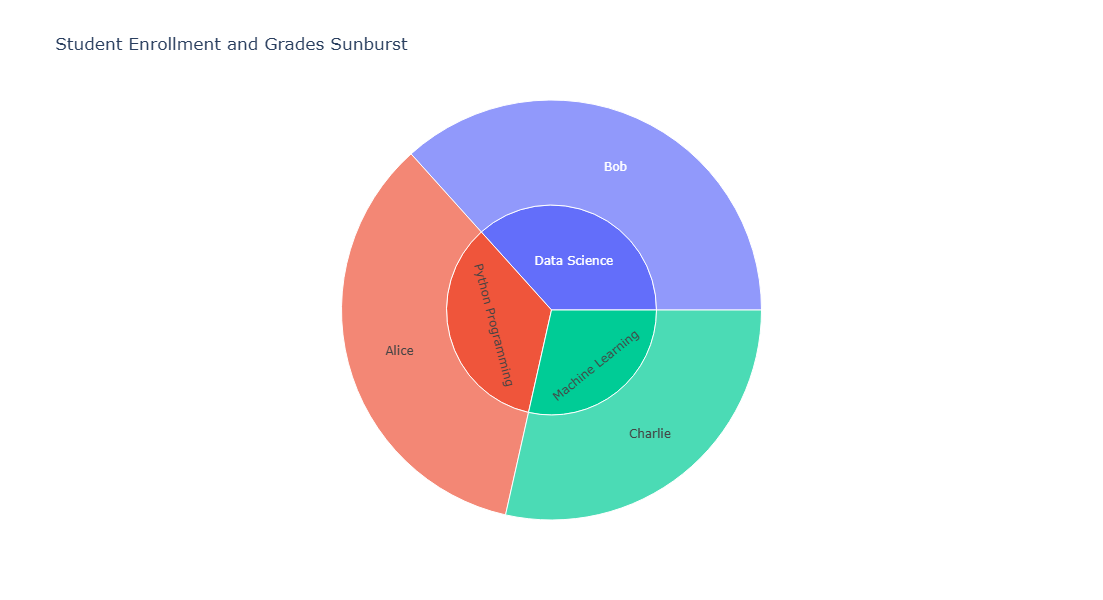


Sunburst Chart Data Output:
Total Students per Course: {'Data Science': 1, 'Machine Learning': 1, 'Python Programming': 1}
Average Grades per Course: {'Data Science': 90.0, 'Machine Learning': 70.0, 'Python Programming': 85.5}


In [19]:
import plotly.express as px

# Assuming df is your DataFrame fetched from the database
def create_sunburst_chart(df):
    # Create a dictionary to hold key-value pair outputs
    output = {}

    # Calculate total number of students and average grades per course
    if not df.empty:
        student_count = df.groupby('course_name')['student_name'].count()
        average_grades = df.groupby('course_name')['grade'].mean()

        # Prepare the output messages
        output["Total Students per Course"] = student_count.to_dict()
        output["Average Grades per Course"] = average_grades.to_dict()

        # Create the Sunburst chart with specified size
        fig = px.sunburst(
            df, 
            path=['course_name', 'student_name'], 
            values='grade', 
            title='Student Enrollment and Grades Sunburst',
            width=800,  # Increase width as desired
            height=600  # Increase height as desired
        )
        fig.show()
    else:
        output["Status"] = "No data available to create a Sunburst chart."

    # Display the output in key-value pairs
    print("\nSunburst Chart Data Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Call the function to create the Sunburst chart and display the outputs
create_sunburst_chart(df)


# Bullet Graph - Course Performance


Average Grades Output:
Data Science: 90.00
Machine Learning: 70.00
Python Programming: 85.50


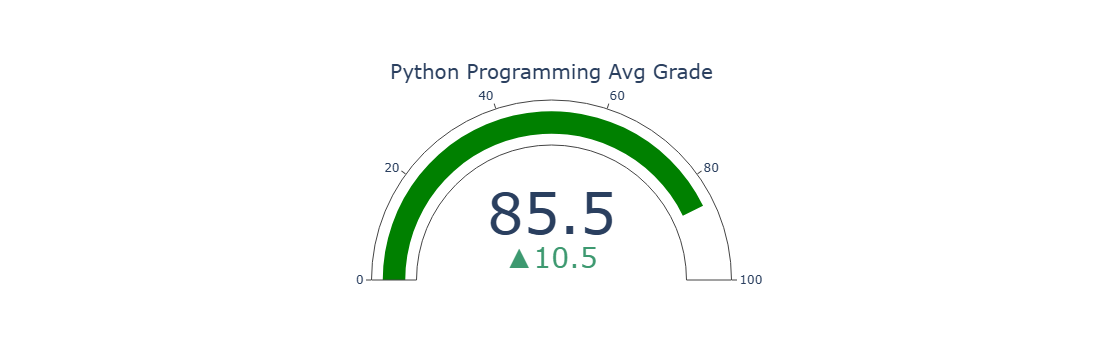

In [20]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame fetched from the database
# Calculate average grades for each course
avg_grades = df.groupby('course_name')['grade'].mean()

# Prepare output messages
output = {
    "Course Names": avg_grades.index.tolist(),
    "Average Grades": avg_grades.values.tolist(),
}

# Display key-value pairs for average grades
print("\nAverage Grades Output:")
for course, avg_grade in zip(output["Course Names"], output["Average Grades"]):
    print(f"{course}: {avg_grade:.2f}")  # Formatting average grade to two decimal places

# Create a bullet graph for the average grade of Python Programming
fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=avg_grades['Python Programming'],
    title={'text': "Python Programming Avg Grade"},
    gauge={'axis': {'range': [None, 100]}},
    delta={'reference': 75}
))

# Show the figure
fig.show()


# Radar Chart - Progress Across Multiple Skills (for one student)

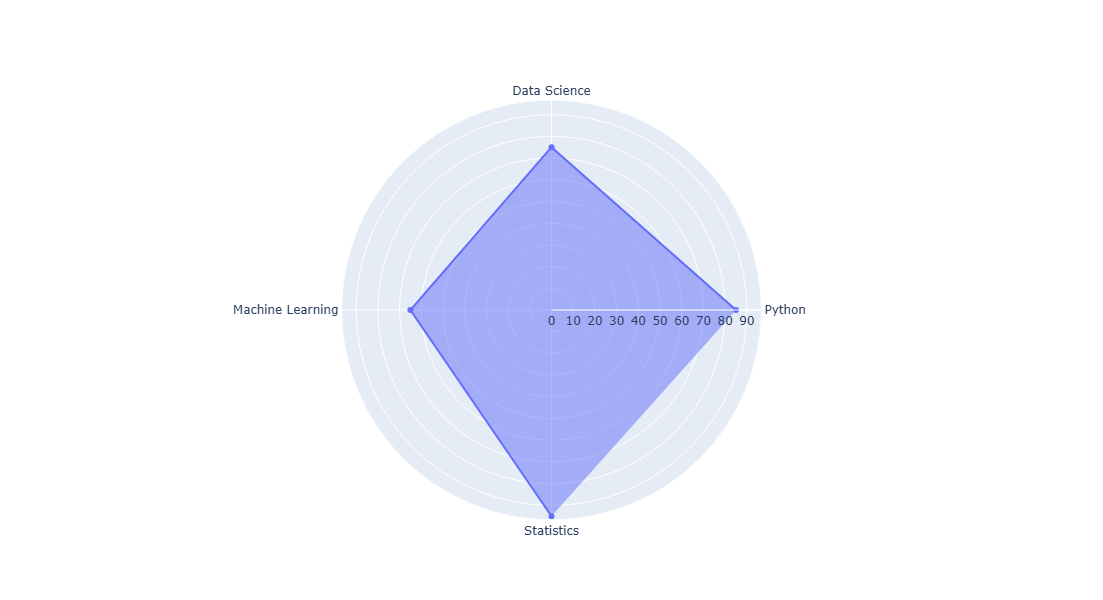


Radar Chart Data Output:
Skills: ['Python', 'Data Science', 'Machine Learning', 'Statistics']
Scores: [85, 75, 65, 95]
Average Score: 80.0
Highest Skill: Statistics
Lowest Skill: Machine Learning


In [22]:
import plotly.graph_objects as go

# Define skills and student scores
skills = ['Python', 'Data Science', 'Machine Learning', 'Statistics']
student1_skills = [85, 75, 65, 95]

# Create a radar chart
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=student1_skills, theta=skills, fill='toself'))

# Update layout with increased size
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=False,
    width=800,  # Set the width of the chart
    height=600  # Set the height of the chart
)

# Show the radar chart
fig.show()

# Generate key-value pairs for output
output = {
    "Skills": skills,
    "Scores": student1_skills,
    "Average Score": sum(student1_skills) / len(student1_skills),
    "Highest Skill": skills[student1_skills.index(max(student1_skills))],
    "Lowest Skill": skills[student1_skills.index(min(student1_skills))]
}

# Display the output in key-value pairs
print("\nRadar Chart Data Output:")
for key, value in output.items():
    print(f"{key}: {value}")


# Slope Chart - Student Progress Before and After a Test


Progress Summary:
Alice: Before Test = 50, After Test = 70, Improvement = 20
Bob: Before Test = 60, After Test = 85, Improvement = 25
Charlie: Before Test = 70, After Test = 75, Improvement = 5
David: Before Test = 80, After Test = 95, Improvement = 15


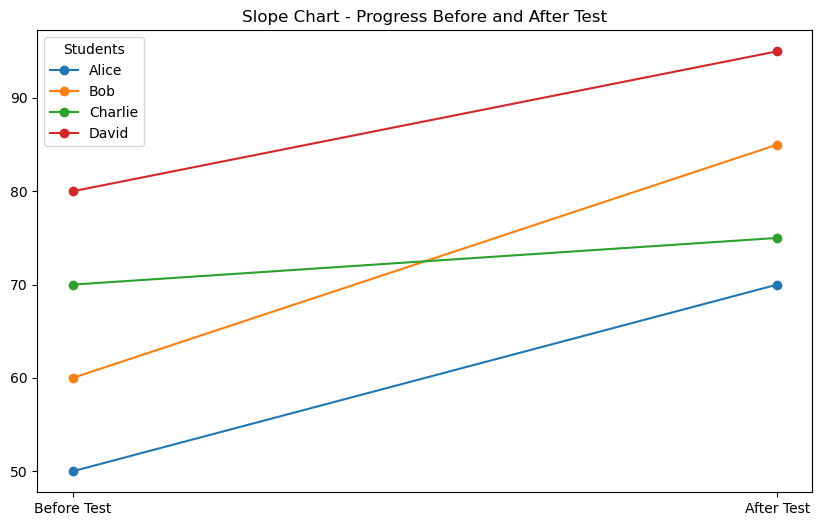

In [23]:
import matplotlib.pyplot as plt

# Test scores and student names
pre_test = [50, 60, 70, 80]
post_test = [70, 85, 75, 95]
students = ['Alice', 'Bob', 'Charlie', 'David']

# Create a dictionary to hold progress information
progress_output = {}

# Calculate progress for each student and store in the dictionary
for i in range(len(students)):
    improvement = post_test[i] - pre_test[i]
    progress_output[students[i]] = {
        "Before Test": pre_test[i],
        "After Test": post_test[i],
        "Improvement": improvement
    }

# Display the output in key-value pairs
print("\nProgress Summary:")
for student, details in progress_output.items():
    print(f"{student}: Before Test = {details['Before Test']}, After Test = {details['After Test']}, Improvement = {details['Improvement']}")

# Create the slope chart
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(students)):
    ax.plot([1, 2], [pre_test[i], post_test[i]], marker='o', label=students[i])
    
ax.set_xticks([1, 2])
ax.set_xticklabels(['Before Test', 'After Test'])
plt.legend(title='Students')
plt.title('Slope Chart - Progress Before and After Test')
plt.show()


# Matrix Plot - Progress Matrix of Multiple Students and Courses

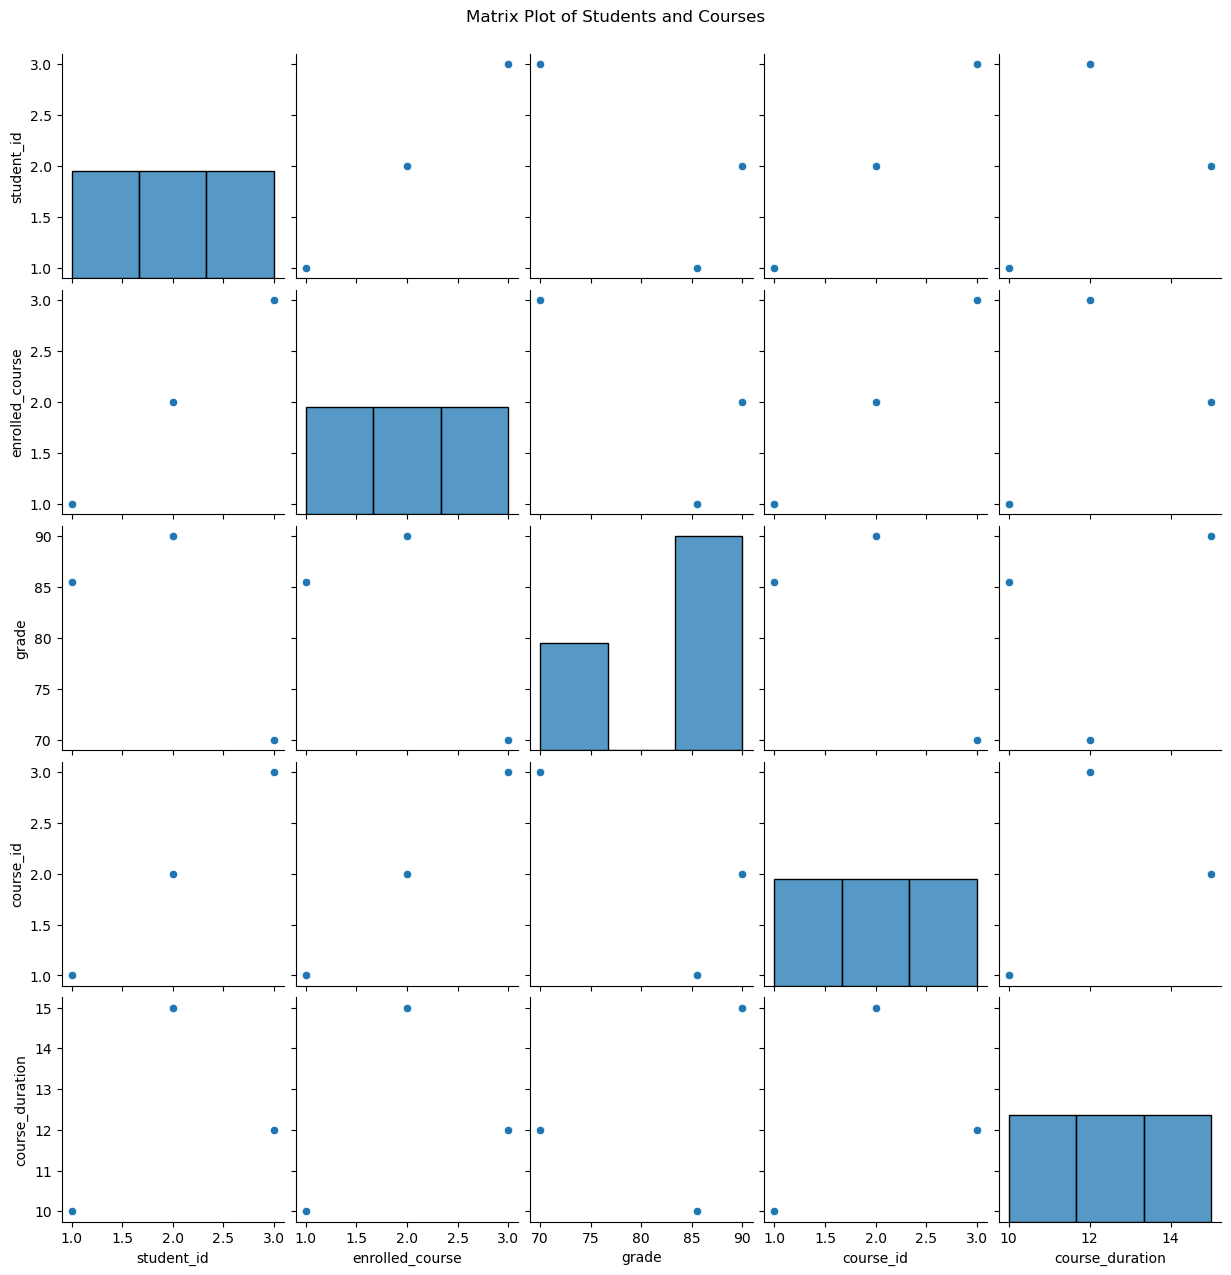


Plot Generation Output:
Plot Status: Data available. Pairplot generation in progress.
Plot Generation: Pairplot generated successfully.
Number of Variables Plotted: 8
Variables: ['student_id', 'student_name', 'enrolled_course', 'grade', 'course_id', 'course_name', 'instructor_name', 'course_duration']


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create pair plot and output key-value pairs
def generate_pairplot(df):
    output = {}  # Dictionary to hold the output messages
    
    # Check if DataFrame is empty
    if df.empty:
        output["Plot Status"] = "No data available for plotting."
    else:
        output["Plot Status"] = "Data available. Pairplot generation in progress."
        
        # Try generating the pair plot
        try:
            sns.pairplot(df)
            plt.suptitle('Matrix Plot of Students and Courses', y=1.02)  # Adding title slightly above the plot
            plt.show()
            output["Plot Generation"] = "Pairplot generated successfully."
            output["Number of Variables Plotted"] = len(df.columns)
            output["Variables"] = df.columns.tolist()
            
        except Exception as e:
            output["Plot Generation"] = f"Failed to generate pairplot: {str(e)}"
    
    # Display the output in key-value pairs
    print("\nPlot Generation Output:")
    for key, value in output.items():
        print(f"{key}: {value}")

# Assuming df is already fetched
generate_pairplot(df)


# Waterfall Chart - Tracking Overall Course Completion                                                                                                                                                   


Course Completion Output:
Total Progress: 80
Modules Completed: 3
Modules Not Completed: 1
Progress Breakdown: {'Introduction to Python': 20, 'Data Structures': 30, 'Algorithms': -10, 'Machine Learning': 40}


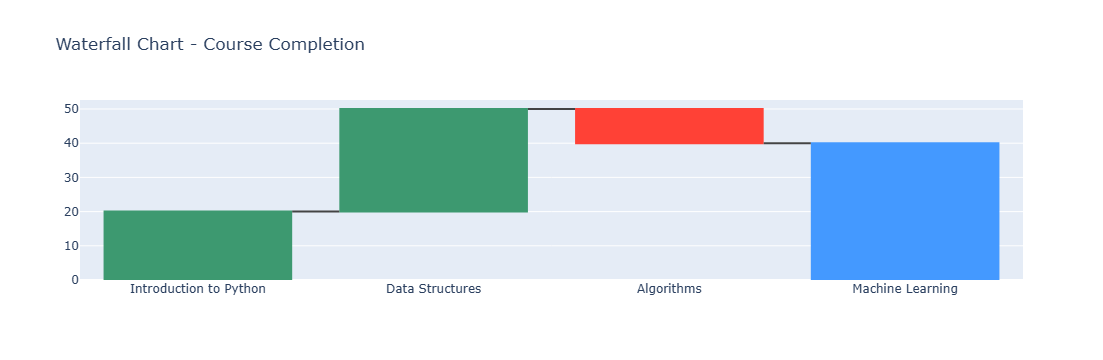

In [26]:
import plotly.graph_objects as go

# Define the original module names and progress values
original_modules = ['Introduction to Python', 'Data Structures', 'Algorithms', 'Machine Learning']
progress = [20, 30, -10, 40]

# Create a waterfall chart
fig = go.Figure(go.Waterfall(x=original_modules, measure=["relative", "relative", "relative", "total"], y=progress))
fig.update_layout(title='Waterfall Chart - Course Completion')

# Generate key-value pairs of output
output = {
    "Total Progress": sum(progress),
    "Modules Completed": len([p for p in progress if p > 0]),
    "Modules Not Completed": len([p for p in progress if p < 0]),
    "Progress Breakdown": {module: progress_value for module, progress_value in zip(original_modules, progress)}
}

# Display the output in key-value pairs
print("\nCourse Completion Output:")
for key, value in output.items():
    print(f"{key}: {value}")

# Show the figure
fig.show()


# Data Validation Check

In [27]:
import pandas as pd

# Sample DataFrame (for example purpose)
# Assuming df is already fetched from the database and contains a 'progress' column
df = pd.DataFrame({
    'student_name': ['Alice', 'Bob', 'Charlie'],
    'progress': [85, 90, 70]  # Sample progress values
})

# Dictionary to store the key-value pair outputs
output = {}

# Check if all progress values are between 0 and 100
if df['progress'].between(0, 100).all():
    output["Progress Check"] = "All student progress values are valid."
else:
    output["Progress Check"] = "Warning: Some progress values are outside the valid range."

# Display the key-value pairs in output
print("\nProgress Validation Output:")
for key, value in output.items():
    print(f"{key}: {value}")



Progress Validation Output:
Progress Check: All student progress values are valid.


# Closing the Database Connection

In [19]:
db.close()
print("Database connection closed.")


Database connection closed.
